## 0. Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

 ## 1. Fit Isotherm Data at Different Temperatures to Isotherm Models

### Define Model

In [2]:
## original dual-site Langmuir (DSL) model

def DL_eq_ori(P, T, qb1, qd1, b1, d1, Ub1, Ud1):
    
    """
    Input 
    P: absolute pressure (Pa)
    T: absolute temperture (K)
    
    qb1: saturation loading for site 1 (mmol/g)
    qd1: saturation loading for site 2 (mmol/g)
    b1: Langmuir constant for site 1 (1/Pa)
    d1: Langmuir constant for site 2 (1/Pa)
    Ub1: heat of adsorption for site 1 (J/mol)
    Ub2: heat of adsorption for site 2 (J/mol)
    
    Output
    q: loading (mmol/g)
    """
    
    
    q=qb1*b1*np.exp(-Ub1/8.314/T)*P/(1+b1*np.exp(-Ub1/8.314/T)*P) + qd1*d1*np.exp(-Ud1/8.314/T)*P/(1+d1*np.exp(-Ud1/8.314/T)*P)
    
    return q

## dual-site Langmuir model at reference temperature (298 K in my case)

def DL_eq_ref(P, qb1, qd1, b1, d1, Ub1, Ud1):
    
    """
    Input 
    P: absolute pressure (Pa)
    
    qb1: saturation loading for site 1 (mmol/g)
    qd1: saturation loading for site 2 (mmol/g)
    b1: Langmuir constant for site 1 (1/Pa)
    d1: Langmuir constant for site 2 (1/Pa)
    Ub1: heat of adsorption for site 1 (J/mol)
    Ub2: heat of adsorption for site 2 (J/mol)
    
    Output
    q: loading (mmol/g)
    """
    
    q=qb1*b1*np.exp(-Ub1/8.314/298)*P/(1+b1*np.exp(-Ub1/8.314/298)*P) + qd1*d1*np.exp(-Ud1/8.314/298)*P/(1+d1*np.exp(-Ud1/8.314/298)*P)
    
    return q

## modified dual-site Langmuir model with scaling factor at reference temperature (298 K in my case)

def DL_th_eq_ref(P, s):
    
    """
    Input 
    P: absolute pressure (Pa)
    s: scaling factor (-)
    
    Output
    q: loading (mmol/g)
    """
    
    q=qb1*b1*np.exp(-Ub1/8.314/298)*(s*P)/(1+b1*np.exp(-Ub1/8.314/298)*(s*P)) + qd1*d1*np.exp(-Ud1/8.314/298)*(s*P)/(1+d1*np.exp(-Ud1/8.314/298)*(s*P))
    
    return q

### Input Information

In [3]:
Name_list = ["high_CO_guobin", "high_CO2_guobin"]

all_tem = [283, 298, 313] ## all temperature list (at least 3)

ref_tem = 298 ## reference temperatures

other_tem = [283, 313] ## other temperatures wo reference temperature (at least 2)

### 1. Isotherm Fitting at Reference Temperatures

high_CO_guobin start
3.96786252
first try
[ 3.89302392e+00  4.87468432e-01  2.07220676e-08  6.46551394e-07
 -1.98175175e+04 -1.98788079e+04]


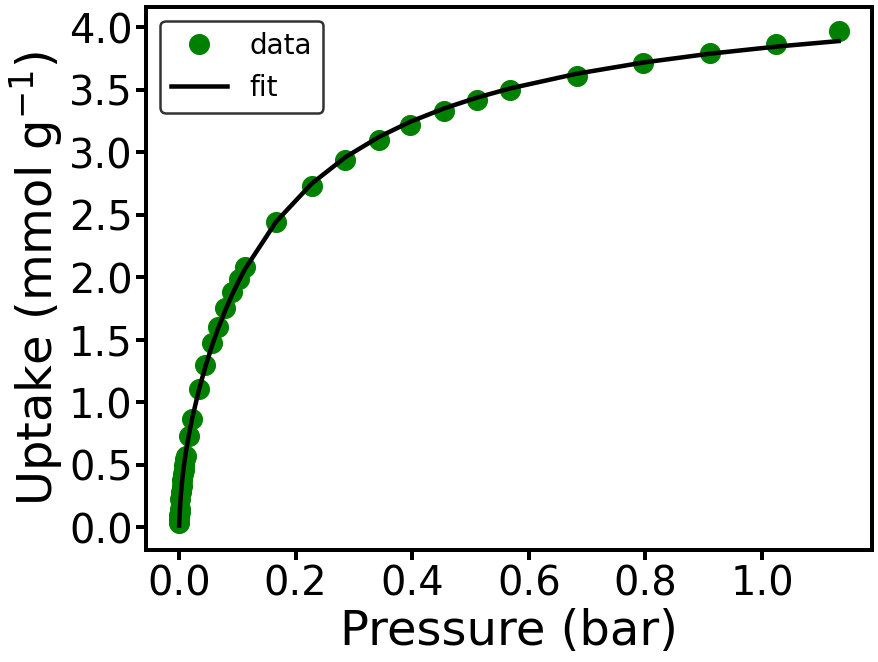

0.9997147429805144
high_CO_guobin finish
high_CO2_guobin start
0.907855827
first try
second try
third try
fourth try
fifth try
sixth try
seventh try
eighth try
[ 3.00885198e+00  0.00000000e+00  8.63839900e-09  0.00000000e+00
 -1.50011878e+04  0.00000000e+00]


C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


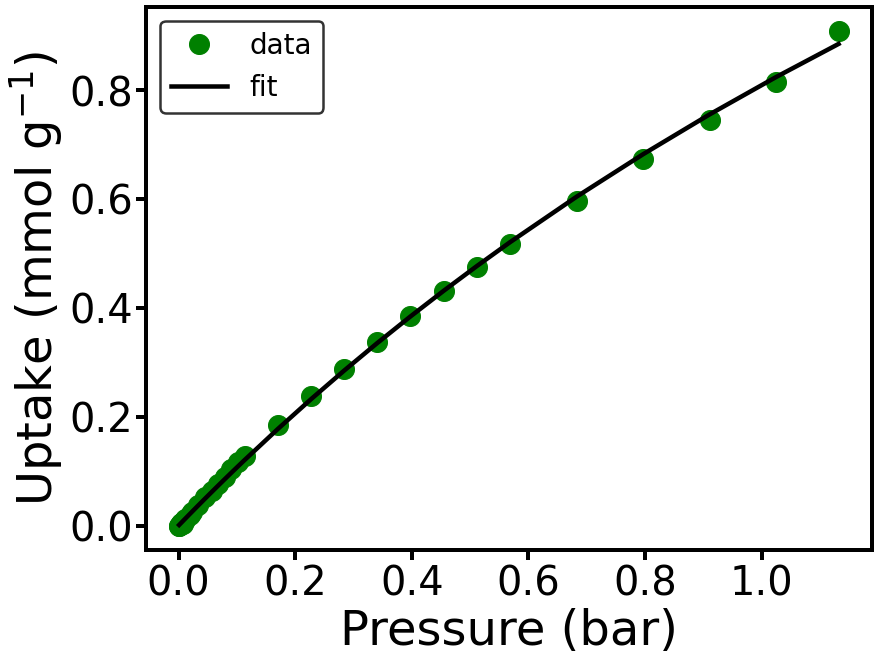

0.9995106922730178
high_CO2_guobin finish


In [4]:
ref_params_list = []

for name1 in Name_list:
    
    print(f"{name1} start")
    
    df1 = pd.read_csv(f"./{name1}_{ref_tem}K.csv")
    
    ## set proper initial guess
    
    init_value = max(df1["q"])
    print(init_value)
    
    if init_value >= 2.00:
        
        init_value1 = init_value/2
        init_value2 = init_value/3
        
    else:
        
        init_value1 = init_value
        init_value2 = init_value
    
    ## First of all, obtain isotherm parameters at reference temperature
    
    try:
        
        print("first try")
        
        pars, pcov = curve_fit(DL_eq_ref, df1["P"]*100000, df1["q"], [init_value1, init_value2, 0, 0, -20000, -20000], maxfev = 100000) 
        
        q_pred = DL_eq_ref(df1["P"]*100000, *pars)
        r2 = r2_score(q_pred, df1["q"])
        
        if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
            raise Exception("wrong parameter")
        
        if r2 < 0.98:
            
                raise Exception("not best parameter")
        
    except:
        try:
            
            print("second try")
            
            pars, pcov = curve_fit(DL_eq_ref, df1["P"]*100000, df1["q"], [init_value1, init_value2, 0, 0, -25000, -25000], maxfev = 100000) 
        
            q_pred = DL_eq_ref(df1["P"]*100000, *pars)
            r2 = r2_score(q_pred, df1["q"])
        
            if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
                raise Exception("wrong parameter")
            
            if r2 < 0.98:
            
                raise Exception("not best parameter")
        
        except:
            try:
                
                print("third try")
                
                pars, pcov = curve_fit(DL_eq_ref, df1["P"]*100000, df1["q"], [init_value1, init_value2, 0, 0, -30000, -30000], maxfev = 100000) 
            
                q_pred = DL_eq_ref(df1["P"]*100000, *pars)
                r2 = r2_score(q_pred, df1["q"])
            
                if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
                    raise Exception("wrong parameter")
            
                if r2 < 0.98:
            
                    raise Exception("not best parameter")
            
            except:
                try:
                    
                    print("fourth try")
                    
                    pars, pcov = curve_fit(DL_eq_ref, df1["P"]*100000, df1["q"], [init_value1, init_value2, 0, 0, -35000, -35000], maxfev = 100000) 
                
                    q_pred = DL_eq_ref(df1["P"]*100000, *pars)
                    r2 = r2_score(q_pred, df1["q"])
                
                    if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
                        raise Exception("wrong parameter")
            
                    if r2 < 0.98:

                        raise Exception("not best parameter")

                except:
                    try:
                        
                        print("fifth try")
                        
                        pars, pcov = curve_fit(DL_eq_ref, df1["P"]*100000, df1["q"], [init_value1, init_value2, 0, 0, -40000, -40000], maxfev = 100000) 
                        
                        q_pred = DL_eq_ref(df1["P"]*100000, *pars)
                        r2 = r2_score(q_pred, df1["q"])
                        
                        if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
                            raise Exception("wrong parameter")
                        
                        if r2 < 0.98:
            
                            raise Exception("not best parameter")
                
                    except:
                        
                        try:
                        
                            print("sixth try")
                        
                            pars, pcov = curve_fit(DL_eq_ref, df1["P"]*100000, df1["q"], [init_value1, init_value2, 0, 0, -45000, -45000], maxfev = 100000) 
                        
                            q_pred = DL_eq_ref(df1["P"]*100000, *pars)
                            r2 = r2_score(q_pred, df1["q"])
                        
                            if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
                                raise Exception("wrong parameter")
            
                            if r2 < 0.98:

                                raise Exception("not best parameter")
                        
                        except:
                            try:

                                print("seventh try")

                                pars, pcov = curve_fit(DL_eq_ref, df1["P"]*100000, df1["q"], [init_value1, init_value2, 0, 0, -50000, -50000], maxfev = 100000) 

                                q_pred = DL_eq_ref(df1["P"]*100000, *pars)
                                r2 = r2_score(q_pred, df1["q"])
                                
                                if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:

                                    raise Exception("wrong parameter")
                                    
                                if r2 < 0.98:
            
                                    raise Exception("not best parameter")

                            except:
                                try:

                                    print("eighth try")

                                    pars, pcov = curve_fit(DL_eq_ref, df1["P"]*100000, df1["q"], [init_value1, 0, 0, 0, -15000, 0], maxfev = 100000) 

                                    q_pred = DL_eq_ref(df1["P"]*100000, *pars)
                                    r2 = r2_score(q_pred, df1["q"])
                                    
                                    if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:

                                        raise Exception("wrong parameter")
                                        
                                    if r2 < 0.98:
            
                                        raise Exception("not best parameter")

                                except:
                                    try:

                                        print("nineth try")

                                        pars, pcov = curve_fit(DL_eq_ref, df1["P"]*100000, df1["q"], [init_value1, 0, 0, 0, -20000, 0], maxfev = 100000) 

                                        q_pred = DL_eq_ref(df1["P"]*100000, *pars)
                                        r2 = r2_score(q_pred, df1["q"])
                                        
                                        if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:

                                            raise Exception("wrong parameter")
                                            
                                        if r2 < 0.98:
            
                                            raise Exception("not best parameter")

                                    except:

                                            print("final try")

                                            pars, pcov = curve_fit(DL_eq_ref, df1["P"]*100000, df1["q"], [init_value1, 0, 0, 0, -25000, 0], maxfev = 100000) 

                                            q_pred = DL_eq_ref(df1["P"]*100000, *pars)
                                            r2 = r2_score(q_pred, df1["q"])
                                            
                                            if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:

                                                raise Exception("wrong parameter")
                                                
                                            if r2 < 0.98:
            
                                                raise Exception("not best parameter")
                                                
                                    
    
    ## show the parameter
    
    parameter_ref_tem = pars
    print(parameter_ref_tem)
    ref_params_list.append(parameter_ref_tem)
    
    ## draw the fitted isotherm
    
    plt.figure(figsize =(13,10)) 
    ax = plt.subplot(1,1,1)
    
    ax.plot(df1["P"], df1["q"], lw=0, marker='o', markersize=20, color='green', label='data')
    ax.plot(df1["P"], DL_eq_ref(df1["P"]*1e5, *parameter_ref_tem), lw=4.5, color='black', label='fit')
    
    plt. xticks(fontsize=40)
    plt. tick_params(axis='both', width=4, length=10)
    plt. yticks(fontsize=40)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(4)

    ax.set_xlabel('Pressure (bar)', fontsize=48)
    ax.set_ylabel('Uptake (mmol g$^{{\u2212}1}$)', fontsize=48)
    
    leg=plt.legend(frameon=True, fontsize=28, loc='best')
    #bbox_to_anchor=(1, 0.18)
    leg.get_frame_on()
    leg.get_frame().set_linewidth(2.5)
    leg.get_frame().set_edgecolor('black')
    
    ## save fitting result
    
    plt.savefig(f"./fit_result_{name1}_{ref_tem}K.png", format='png', dpi=300)
    
    plt.show()
    print(r2)
    print(f"{name1} finish")
    

### 2. Get Scaling Factors at Other Temperatures and 3. Get Final Isotherm Parameter using Scaled Isotherm

In [5]:
## Define fucntion that Calculate R2 and RMSE

def R2_RMSE_fun(all_tem, parameter_final):
    
    if len(all_tem) == 3:
        
        ## calculate r_square
        
        fit_compare_value2 = DL_eq_ori(df2["P"]*1e5, all_tem[0], *parameter_final)
        fit_compare_value1 = DL_eq_ori(df1["P"]*1e5, all_tem[1], *parameter_final)
        fit_compare_value3 = DL_eq_ori(df3["P"]*1e5, all_tem[2], *parameter_final)
        
        ss_res2 = np.dot(df2["q"]-fit_compare_value2, df2["q"]-fit_compare_value2)
        ss_res1 = np.dot(df1["q"]-fit_compare_value1, df1["q"]-fit_compare_value1)
        ss_res3 = np.dot(df3["q"]-fit_compare_value3, df3["q"]-fit_compare_value3)
        
        df_other_tem1_for_r2 = pd.DataFrame({"P": df2["P"], "q": df2["q"]})
        df_ref_tem_for_r2 = pd.DataFrame({"P": df1["P"], "q": df1["q"]})
        df_other_tem2_for_r2 = pd.DataFrame({"P": df3["P"], "q": df3["q"]})

        df_gather1_for_r2 = df_other_tem1_for_r2.append(df_ref_tem_for_r2, ignore_index = True)
        df_all_data_for_r2 = df_gather1_for_r2.append(df_other_tem2_for_r2, ignore_index = True)

        mean_value = np.mean(df_all_data_for_r2["q"])  

        ss_tot = np.dot(df_all_data_for_r2["q"]-mean_value, df_all_data_for_r2["q"]-mean_value)

        r_square = 1 - (ss_res1+ss_res2+ss_res3)/ss_tot

        ## calcaulate RMSE (root mean square error) ##

        RMSE = ((ss_res1+ss_res2+ss_res3)/len(df_all_data_for_r2["q"]))**0.5
        
    elif len(all_tem) == 4:
        
        ## calculate r_square
        
        fit_compare_value1 = DL_eq_ori(df2["P"]*1e5, all_tem[0], *parameter_final)
        fit_compare_value2 = DL_eq_ori(df1["P"]*1e5, all_tem[1], *parameter_final)
        fit_compare_value3 = DL_eq_ori(df3["P"]*1e5, all_tem[2], *parameter_final)
        fit_compare_value4 = DL_eq_ori(df4["P"]*1e5, all_tem[3], *parameter_final)
        
        ss_res1 = np.dot(df2["q"]-fit_compare_value1, df2["q"]-fit_compare_value1)
        ss_res2 = np.dot(df1["q"]-fit_compare_value2, df1["q"]-fit_compare_value2)
        ss_res3 = np.dot(df3["q"]-fit_compare_value3, df3["q"]-fit_compare_value3)
        ss_res4 = np.dot(df4["q"]-fit_compare_value4, df4["q"]-fit_compare_value4)
        
        df_other_tem1_for_r2 = pd.DataFrame({"P": df2["P"], "q": df2["q"]})
        df_ref_tem_for_r2 = pd.DataFrame({"P": df1["P"], "q": df1["q"]})
        df_other_tem2_for_r2 = pd.DataFrame({"P": df3["P"], "q": df3["q"]})
        df_other_tem3_for_r2 = pd.DataFrame({"P": df4["P"], "q": df4["q"]})

        df_gather1_for_r2 = df_other_tem1_for_r2.append(df_ref_tem_for_r2, ignore_index = True)
        df_gather2_for_r2 = df_gather1_for_r2.append(df_other_tem2_for_r2, ignore_index = True)
        df_all_data_for_r2 = df_gather2_for_r2.append(df_other_tem3_for_r2, ignore_index = True)

        mean_value = np.mean(df_all_data_for_r2["q"])  

        ss_tot = np.dot(df_all_data_for_r2["q"]-mean_value, df_all_data_for_r2["q"]-mean_value)

        r_square = 1 - (ss_res1+ss_res2+ss_res3+ss_res4)/ss_tot

        ## calcaulate RMSE (root mean square error) ##

        RMSE = ((ss_res1+ss_res2+ss_res3+ss_res4)/len(df_all_data_for_r2["q"]))**0.5
        
    else:
        
        raise("error")
    
    return r_square, RMSE

high_CO_guobin start
[2.239965676206155, 0.3991176626226349]
first try
second try
third try


C:\Users\User\AppData\Local\Temp/ipykernel_29460/2135317780.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gather1 = df_ref_tem.append(df_other_tem1, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/2135317780.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_tem_data = df_gather1.append(df_other_tem2, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gather1_for_r2 = df_other_tem1_for_r2.append(df_ref_tem_for_r2, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

fourth try
[ 4.08223690e-01  3.78583985e+00  1.95710053e-09  5.28727623e-11
 -3.49700832e+04 -3.50288916e+04]


C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gather1_for_r2 = df_other_tem1_for_r2.append(df_ref_tem_for_r2, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_for_r2 = df_gather1_for_r2.append(df_other_tem2_for_r2, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gather1_for_r2 = df_other_tem1_for_r2.append(df_ref_tem_for_r2, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:22: FutureWarning: The frame.append method is deprecated and will 

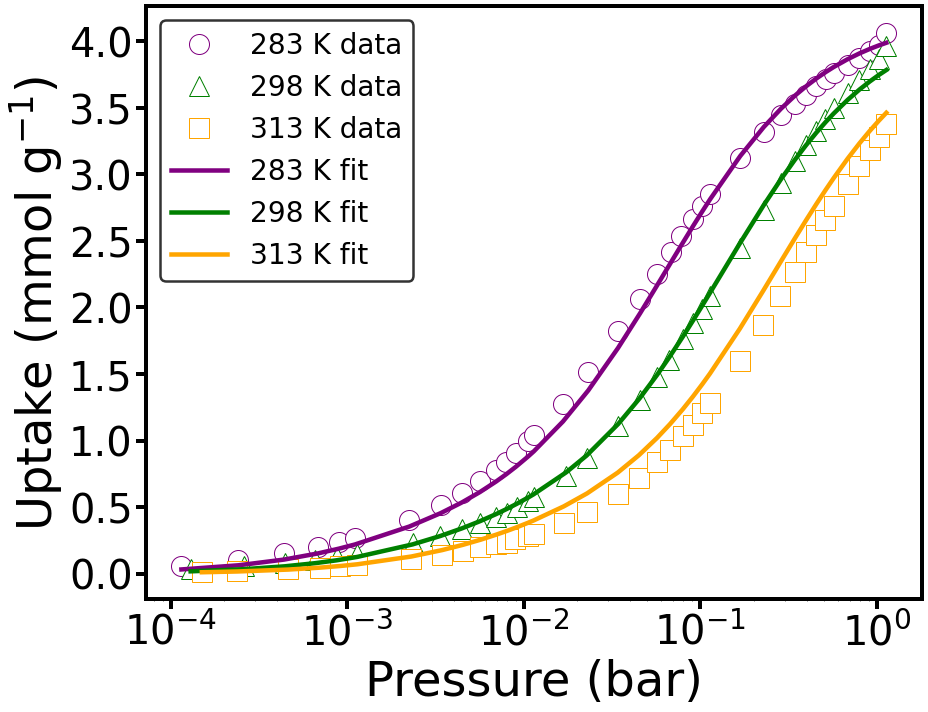

C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gather1_for_r2 = df_other_tem1_for_r2.append(df_ref_tem_for_r2, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_for_r2 = df_gather1_for_r2.append(df_other_tem2_for_r2, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/2135317780.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gather1 = df_ref_tem.append(df_other_tem1, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/2135317780.py:55: FutureWarning: The frame.append method is deprecated and will be removed from panda

r_square for high_CO_guobin:0.9941188687392563
RMSE for high_CO_guobin:0.10390701872177742
high_CO_guobin finish
high_CO2_guobin start
[1.4611062647996218, 0.6408731087464615]
first try
second try
third try
fourth try
fifth try
sixth try
seventh try
eighth try
[ 2.97929719e+00  0.00000000e+00  1.16567264e-09  0.00000000e+00
 -1.99956960e+04  0.00000000e+00]


C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gather1_for_r2 = df_other_tem1_for_r2.append(df_ref_tem_for_r2, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_for_r2 = df_gather1_for_r2.append(df_other_tem2_for_r2, ignore_index = True)
C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estim

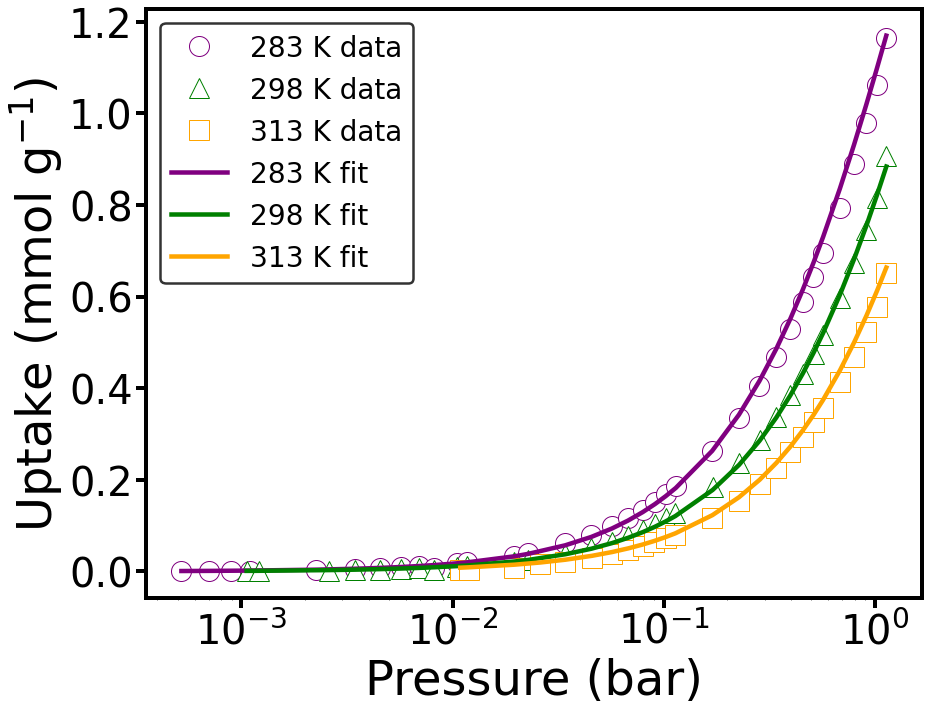

r_square for high_CO2_guobin:0.9976716245058824
RMSE for high_CO2_guobin:0.013908186623022005
high_CO2_guobin finish


C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gather1_for_r2 = df_other_tem1_for_r2.append(df_ref_tem_for_r2, ignore_index = True)
C:\Users\User\AppData\Local\Temp/ipykernel_29460/1460616208.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_for_r2 = df_gather1_for_r2.append(df_other_tem2_for_r2, ignore_index = True)


In [6]:
final_params_list = []
scaling_params_list = []

for i, name2 in enumerate(Name_list):
    
    print(f"{name2} start")
    
    ## load data at reference temperature
    
    df1 = pd.read_csv(f"./{name2}_{ref_tem}K.csv")
    
    parameter_ref_tem = ref_params_list[i]
    
    qb1 = parameter_ref_tem[0]
    qd1 = parameter_ref_tem[1]
    b1  = parameter_ref_tem[2]
    d1  = parameter_ref_tem[3]
    Ub1 = parameter_ref_tem[4]
    Ud1 = parameter_ref_tem[5]
    
    ## get scaling factors and the scaled isotherm data
    
    if len(other_tem) == 2:
        
        ## two other temperatures
        
        other_tem1 = other_tem[0]
        other_tem2 = other_tem[1]
        
        df2 = pd.read_csv(f"./{name2}_{other_tem1}K.csv")
        df3 = pd.read_csv(f"./{name2}_{other_tem2}K.csv")
        
        ## get scaling factor
        
        pars1, pcov1 = curve_fit(DL_th_eq_ref, df2["P"]*100000, df2["q"], [50])
        parameter_other_tem1 = pars1

        pars2, pcov2 = curve_fit(DL_th_eq_ref, df3["P"]*100000, df3["q"], [0.5])
        parameter_other_tem2 = pars2
        
        scaling_factor_list = [parameter_other_tem1[0], parameter_other_tem2[0]]
        print(scaling_factor_list)
        scaling_params_list.append(scaling_factor_list)
        
        ## gather all data
        
        df_ref_tem = pd.DataFrame({"P":df1["P"], "q":df1["q"]})

        df_other_tem1 = pd.DataFrame({"P":parameter_other_tem1[0]*df2["P"], "q": df2["q"]})

        df_other_tem2 = pd.DataFrame({"P":parameter_other_tem2[0]*df3["P"], "q": df3["q"]})

        df_gather1 = df_ref_tem.append(df_other_tem1, ignore_index = True)

        df_all_tem_data = df_gather1.append(df_other_tem2, ignore_index = True)
        
    elif len(other_tem) == 3:
        
        ## three other temperature
        
        other_tem1 = other_tem[0]
        other_tem2 = other_tem[1]
        other_tem3 = other_tem[2]
        
        df2 = pd.read_csv(f"./{name2}_{other_tem1}K.csv")
        df3 = pd.read_csv(f"./{name2}_{other_tem2}K.csv")
        df4 = pd.read_csv(f"./{name2}_{other_tem3}K.csv")
        
        ## get scaling factor
        
        pars1, pcov1 = curve_fit(DL_th_eq_ref, df2["P"]*100000, df2["q"], [50])
        parameter_other_tem1 = pars1

        pars2, pcov2 = curve_fit(DL_th_eq_ref, df3["P"]*100000, df3["q"], [0.8])
        parameter_other_tem2 = pars2
        
        pars3, pcov3 = curve_fit(DL_th_eq_ref, df4["P"]*100000, df4["q"], [0.2])
        parameter_other_tem3 = pars3
        
        scaling_factor_list = [parameter_other_tem1[0], parameter_other_tem2[0], parameter_other_tem3[0]]
        print(scaling_factor_list)
        scaling_params_list.append(scaling_factor_list)
        
        ## gather all data
        
        df_ref_tem = pd.DataFrame({"P":df1["P"], "q":df1["q"]})

        df_other_tem1 = pd.DataFrame({"P":parameter_other_tem1[0]*df2["P"], "q": df2["q"]})

        df_other_tem2 = pd.DataFrame({"P":parameter_other_tem2[0]*df3["P"], "q": df3["q"]})
        
        df_other_tem3 = pd.DataFrame({"P":parameter_other_tem3[0]*df4["P"], "q": df4["q"]})

        df_gather1 = df_ref_tem.append(df_other_tem1, ignore_index = True)
        
        df_gather2 = df_gather1.append(df_other_tem2, ignore_index = True)

        df_all_tem_data = df_gather2.append(df_other_tem3, ignore_index = True)
        
    else:
        
        raise("error")
    
    ## get final isotherm parameter using scaled isotherm data
    
    init_value = max(df_all_tem_data["q"])
    
    if init_value >= 2.00:
        
        init_value1 = init_value/2
        init_value2 = init_value/3
    
    else:
        
        init_value1 = init_value
        init_value2 = init_value
    
    ## First of all, obtain isotherm parameters at reference temperature
    
    try:
        
        print("first try")
        
        pars, pcov = curve_fit(DL_eq_ref, df_all_tem_data["P"]*100000, df_all_tem_data["q"], [init_value1, init_value2, 0, 0, -20000, -20000], maxfev = 100000) 
    
        if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
            raise Exception("wrong parameter")
        
        if R2_RMSE_fun(all_tem, pars)[0] < 0.99 or R2_RMSE_fun(all_tem, pars)[1] > 0.15:
            
            raise Exception("not best parameter")
        
    except:
        try:
            
            print("second try")
            
            pars, pcov = curve_fit(DL_eq_ref, df_all_tem_data["P"]*100000, df_all_tem_data["q"], [init_value1, init_value2, 0, 0, -25000, -25000], maxfev = 100000) 
        
            if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
                raise Exception("wrong parameter")
            
            if R2_RMSE_fun(all_tem, pars)[0] < 0.99 or R2_RMSE_fun(all_tem, pars)[1] > 0.15:
            
                raise Exception("not best parameter")
        
        except:
            try:
                
                print("third try")
                
                pars, pcov = curve_fit(DL_eq_ref, df_all_tem_data["P"]*100000, df_all_tem_data["q"], [init_value1, init_value2, 0, 0, -30000, -30000], maxfev = 100000) 
            
                if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
                    raise Exception("wrong parameter")
                
                if R2_RMSE_fun(all_tem, pars)[0] < 0.99 or R2_RMSE_fun(all_tem, pars)[1] > 0.15:
            
                    raise Exception("not best parameter")
            
            except:
                try:
                    
                    print("fourth try")
                    
                    pars, pcov = curve_fit(DL_eq_ref, df_all_tem_data["P"]*100000, df_all_tem_data["q"], [init_value1, init_value2, 0, 0, -35000, -35000], maxfev = 100000) 
                
                    if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
                        raise Exception("wrong parameter")
                
                    if R2_RMSE_fun(all_tem, pars)[0] < 0.99 or R2_RMSE_fun(all_tem, pars)[1] > 0.15:
            
                        raise Exception("not best parameter")
                
                except:
                    try:
                        
                        print("fifth try")
                        
                        pars, pcov = curve_fit(DL_eq_ref, df_all_tem_data["P"]*100000, df_all_tem_data["q"], [init_value1, init_value2, 0, 0, -40000, -40000], maxfev = 100000) 
                        
                        if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
                            raise Exception("wrong parameter")
                        
                        if R2_RMSE_fun(all_tem, pars)[0] < 0.99 or R2_RMSE_fun(all_tem, pars)[1] > 0.15:
            
                            raise Exception("not best parameter")
                
                    except:
                        try:
                        
                            print("sixth try")
                        
                            pars, pcov = curve_fit(DL_eq_ref, df_all_tem_data["P"]*100000, df_all_tem_data["q"], [init_value1, init_value2, 0, 0, -45000, -45000], maxfev = 100000) 
                        
                            if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:
        
                                raise Exception("wrong parameter")
                        
                            if R2_RMSE_fun(all_tem, pars)[0] < 0.99 or R2_RMSE_fun(all_tem, pars)[1] > 0.15:
            
                                raise Exception("not best parameter")
                        
                        except:
                            try:

                                print("seventh try")

                                pars, pcov = curve_fit(DL_eq_ref, df_all_tem_data["P"]*100000, df_all_tem_data["q"], [init_value2, 0, 0, 0, -50000, -50000], maxfev = 100000) 

                                if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:

                                    raise Exception("wrong parameter")

                                if R2_RMSE_fun(all_tem, pars)[0] < 0.99 or R2_RMSE_fun(all_tem, pars)[1] > 0.15:

                                    raise Exception("not best parameter")

                            except:
                                try:

                                    print("eighth try")

                                    pars, pcov = curve_fit(DL_eq_ref, df_all_tem_data["P"]*100000, df_all_tem_data["q"], [init_value2, 0, 0, 0, -20000, 0], maxfev = 100000) 

                                    if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:

                                        raise Exception("wrong parameter")

                                    if R2_RMSE_fun(all_tem, pars)[0] < 0.99 or R2_RMSE_fun(all_tem, pars)[1] > 0.15:

                                        raise Exception("not best parameter")

                                except:
                                    try:

                                        print("nineth try")

                                        pars, pcov = curve_fit(DL_eq_ref, df_all_tem_data["P"]*100000, df_all_tem_data["q"], [init_value2, 0, 0, 0, -25000, 0], maxfev = 100000) 

                                        if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:

                                            raise Exception("wrong parameter")

                                        if R2_RMSE_fun(all_tem, pars)[0] < 0.99 or R2_RMSE_fun(all_tem, pars)[1] > 0.15:

                                            raise Exception("not best parameter")

                                    except:

                                        print("final try")

                                        pars, pcov = curve_fit(DL_eq_ref, df_all_tem_data["P"]*100000, df_all_tem_data["q"], [init_value2, 0, 0, 0, -30000, 0], maxfev = 100000) 

                                        if float(pars[0]) >= 1e2 or float(pars[1]) >= 1e2 or float(pars[0]) < 0 or float(pars[1]) < 0 or float(pars[2]) < 0 or float(pars[3]) < 0 or float(pars[4]) > 0 or float(pars[5]) > 0:

                                            raise Exception("wrong parameter")

                                        if R2_RMSE_fun(all_tem, pars)[0] < 0.99 or R2_RMSE_fun(all_tem, pars)[1] > 0.15:

                                            raise Exception("not best parameter")
                                        
    
    ## show the parameter
    
    parameter_final = pars
    print(parameter_final)
    final_params_list.append(parameter_final)

    ## draw the fitted isotherm at all temperatures
    
    if len(other_tem) == 2:
    
        plt.figure(figsize =(13,10)) 
        ax = plt.subplot(1,1,1)

        ax.plot(df2["P"], df2["q"], lw=0, marker='o', markerfacecolor = 'white', markersize=20, color='purple', label=f'{other_tem1} K data')
        ax.plot(df1["P"], df1["q"], lw=0, marker='^', markerfacecolor = 'white', markersize=20, color='green', label=f'{ref_tem} K data')
        ax.plot(df3["P"], df3["q"], lw=0, marker='s', markerfacecolor = 'white', markersize=20, color='orange', label=f'{other_tem2} K data')

        ax.plot(df2["P"], DL_eq_ori(df2["P"]*100000, other_tem1, *parameter_final), lw=4.5, color='purple', label=f'{other_tem1} K fit')
        ax.plot(df1["P"], DL_eq_ori(df1["P"]*100000, ref_tem, *parameter_final), lw=4.5, color='green', label=f'{ref_tem} K fit')
        ax.plot(df3["P"], DL_eq_ori(df3["P"]*100000, other_tem2, *parameter_final), lw=4.5, color='orange', label=f'{other_tem2} K fit')

        plt.semilogx()
        #ax.set_xlim(-0.05,51)
        #plt. ylim(-0.05,7)
        plt. xticks(fontsize=40)
        plt. tick_params(axis='both', width=4, length=10)
        plt. yticks(fontsize=40)

        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(4)

        ax.set_xlabel('Pressure (bar)', fontsize=48)
        ax.set_ylabel('Uptake (mmol g$^{{\u2212}1}$)', fontsize=48)

        leg=plt.legend(frameon=True, fontsize=28, loc='best')
        #bbox_to_anchor=(1, 0.18)
        leg.get_frame_on()
        leg.get_frame().set_linewidth(2.5)
        leg.get_frame().set_edgecolor('black')
        
        plt.tight_layout()

        ## save fitting result

        plt.savefig(f"./fit_result_final_{name2}.png", format='png', dpi=300)
        plt.show()
         
        ## calculate R2 and RMSE
        R2, RMSE = R2_RMSE_fun(all_tem, parameter_final)
        print(f"r_square for {name2}:"+str(R2))
        print(f"RMSE for {name2}:"+str(RMSE))
        
        print(f"{name2} finish")
        
    elif len(other_tem) == 3:
        
        plt.figure(figsize =(13,10)) 
        ax = plt.subplot(1,1,1)

        ax.plot(df2["P"], df2["q"], lw=0, marker='o', markerfacecolor = 'white', markersize=20, color='purple', label=f'{other_tem1} K data')
        ax.plot(df1["P"], df1["q"], lw=0, marker='^', markerfacecolor = 'white', markersize=20, color='green', label=f'{ref_tem} K data')
        ax.plot(df3["P"], df3["q"], lw=0, marker='s', markerfacecolor = 'white', markersize=20, color='orange', label=f'{other_tem2} K data')
        ax.plot(df4["P"], df4["q"], lw=0, marker='v', markerfacecolor = 'white', markersize=20, color='red', label=f'{other_tem3} K data')

        ax.plot(df2["P"], DL_eq_ori(df2["P"]*100000, other_tem1, *parameter_final), lw=4.5, color='purple', label=f'{other_tem1} K fit')
        ax.plot(df1["P"], DL_eq_ori(df1["P"]*100000, ref_tem, *parameter_final), lw=4.5, color='green', label=f'{ref_tem} K fit')
        ax.plot(df3["P"], DL_eq_ori(df3["P"]*100000, other_tem2, *parameter_final), lw=4.5, color='orange', label=f'{other_tem2} K fit')
        ax.plot(df4["P"], DL_eq_ori(df4["P"]*100000, other_tem3, *parameter_final), lw=4.5, color='red', label=f'{other_tem3} K fit')
        
        plt.semilogx()
        ax.set_xlim(-0.05,51)
        #plt. ylim(-0.05,7)
        plt. xticks(fontsize=40)
        plt. tick_params(axis='both', width=4, length=10)
        plt. yticks(fontsize=40)

        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(4)

        ax.set_xlabel('Pressure / bar', fontsize=48)
        ax.set_ylabel('Uptake / mmol g$^{{\u2212}1}$', fontsize=48)

        leg=plt.legend(frameon=True, fontsize=28, loc='best')
        #bbox_to_anchor=(1, 0.18)
        leg.get_frame_on()
        leg.get_frame().set_linewidth(2.5)
        leg.get_frame().set_edgecolor('black')
        
        plt.tight_layout()

        ## save fitting result

        plt.savefig(f"./fit_result_final_{name}.png",format='png')
        plt.show()
        
        ## calculate R2 and RMSE
        R2, RMSE = R2_RMSE_fun(all_tem, parameter_final)
        print(f"r_square for {name2}:"+str(R2))
        print(f"RMSE for {name2}:"+str(RMSE))
        
        print(f"{name2} finish")
    
    else:
        
        raise("error")
    

### 4. Get Heat of Adsorption Data

In [7]:
## Define function that calculate heat of adsorption based on C-C equation

def heat_eq(T, H):
    s=np.exp((H/8.3145)*(1/T-1/298)) ## reference temperature is 298 K in my case
    return s

high_CO_guobin start
[2.2951064476916803, 1, 0.39058129766053695]
[39128.90768796]


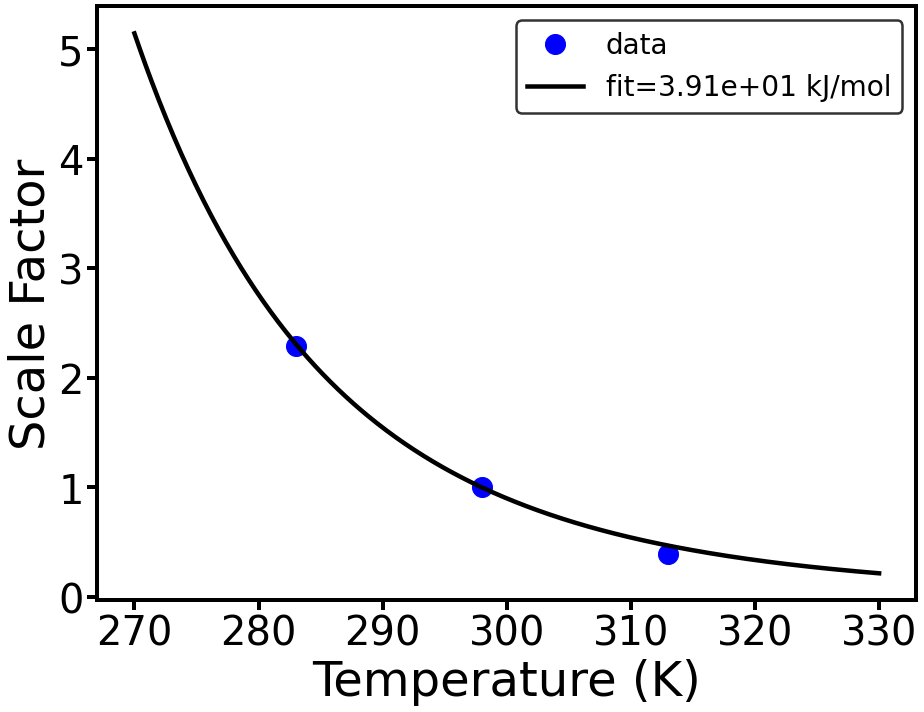

high_CO_guobin finish
high_CO2_guobin start
[1.4621723726237248, 1, 0.6400574753211968]
[18547.67733543]


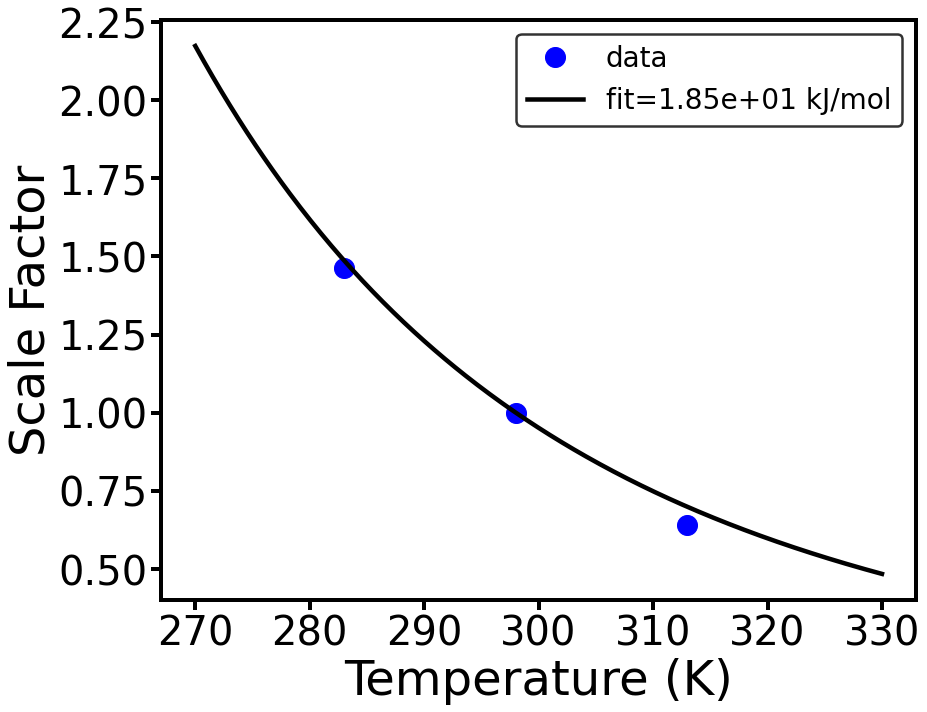

high_CO2_guobin finish


In [8]:
delta_H_list = []

for i, name3 in enumerate(Name_list):
    
    print(f"{name3} start")
    
    ## load final_isotherm_parameter
    
    parameter_final = final_params_list[i]
    
    qb1 = parameter_final[0]
    qd1 = parameter_final[1]
    b1  = parameter_final[2]
    d1  = parameter_final[3]
    Ub1 = parameter_final[4]
    Ud1 = parameter_final[5]
    
    ## get final scaling factors
    
    if len(other_tem) == 2:
        
        ## two other temperatures
        
        other_tem1 = other_tem[0]
        other_tem2 = other_tem[1]
        
        df2 = pd.read_csv(f"./{name3}_{other_tem1}K.csv")
        df3 = pd.read_csv(f"./{name3}_{other_tem2}K.csv")
        
        ## get final scaling factor
        
        pars1, pcov1 = curve_fit(DL_th_eq_ref, df2["P"]*100000, df2["q"], [50])
        final_parameter_other_tem1 = pars1

        pars2, pcov2 = curve_fit(DL_th_eq_ref, df3["P"]*100000, df3["q"], [0.5])
        final_parameter_other_tem2 = pars2
        
        final_scaling_factor_list = [final_parameter_other_tem1[0], 1, final_parameter_other_tem2[0]]
        print(final_scaling_factor_list)
        
    elif len(other_tem) == 3:
        
        ## three other temperature
        
        other_tem1 = other_tem[0]
        other_tem2 = other_tem[1]
        other_tem3 = other_tem[2]
        
        df2 = pd.read_csv(f"./{name3}_{other_tem1}K.csv")
        df3 = pd.read_csv(f"./{name3}_{other_tem2}K.csv")
        df4 = pd.read_csv(f"./{name3}_{other_tem3}K.csv")
        
        ## get final scaling factor
        
        pars1, pcov1 = curve_fit(DL_th_eq_ref, df2["P"]*100000, df2["q"], [50])
        final_parameter_other_tem1 = pars1

        pars2, pcov2 = curve_fit(DL_th_eq_ref, df3["P"]*100000, df3["q"], [0.8])
        final_parameter_other_tem2 = pars2
        
        pars3, pcov3 = curve_fit(DL_th_eq_ref, df4["P"]*100000, df4["q"], [0.2])
        final_parameter_other_tem3 = pars3
        
        final_scaling_factor_list = [final_parameter_other_tem1[0], 1, final_parameter_other_tem2[0], final_parameter_other_tem3[0]]
        print(final_scaling_factor_list)
        
    else:
        
        raise("error")
    
    ## get heat of adsorption value using C-C equation
    
    pars, pcov = curve_fit(heat_eq, all_tem, final_scaling_factor_list, [20000])
    heat_of_ads = pars
    print(heat_of_ads)
    delta_H_list.append(heat_of_ads)
    
    ## draw the scaliing factors 
    
    plt.figure(figsize =(13,10)) 
    ax = plt.subplot(1,1,1)
    
    T_range = np.linspace(270,330,400)
    
    ax.plot(all_tem, final_scaling_factor_list, lw=0, marker='o', markersize=20, color='blue', label='data')
    ax.plot(T_range, heat_eq(T_range, *heat_of_ads), lw=4.5, color='black', label='fit={0:.2e} kJ/mol'.format(heat_of_ads[0]/1000))

    #ax.set_xlim(-0.05,51)
    #plt. ylim(-0.05,7)
    plt. xticks(fontsize=40)
    plt. tick_params(axis='both', width=4, length=10)
    plt. yticks(fontsize=40)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(4)

    plt.xlabel('Temperature (K)', fontsize=48)
    plt.ylabel('Scale Factor', fontsize=48)

    leg=plt.legend(frameon=True, fontsize=28, loc='best')
    #bbox_to_anchor=(1, 0.18)
    leg.get_frame_on()
    leg.get_frame().set_linewidth(2.5)
    leg.get_frame().set_edgecolor('black')
    
    plt.tight_layout()

    ## save fitting result

    plt.savefig(f"./fit_result_final_heat_{name3}.png", format='png', dpi=300)
    plt.show()
    
    print(f"{name3} finish")
    